<a href="https://colab.research.google.com/github/Josepholaidepetro/Umojahack/blob/main/umojahack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# LOAD DATA

In [2]:
build_data=pd.read_csv(r'/content/drive/MyDrive/umoja data/UHNigeria/Train.csv')
test_data=pd.read_csv(r'/content/drive/MyDrive/umoja data/UHNigeria/Test.csv')
var_descr = pd.read_csv(r'/content/drive/MyDrive/umoja data/UHNigeria/VariableDefinitions.csv')

In [3]:
build_data.head(2)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1


# Checking for cardinality

In [4]:
lis3=[]
for i in build_data:
    lis3.append(build_data[str(i)].nunique())

cardinal=pd.DataFrame(lis3,build_data.columns).reset_index()
cardinal=cardinal.rename(columns={'index':'Features',0:'cardinality'})

In [5]:
cardinal

,Features,cardinality
0,ID,12079
1,Policy Start Date,376
2,Policy End Date,372
3,Gender,7
4,Age,110
5,First Transaction Date,376
6,No_Pol,8
7,Car_Category,16
8,Subject_Car_Colour,45
9,Subject_Car_Make,74


In [6]:
build_data.isna().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [7]:
test_data.isna().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     156
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              1638
Subject_Car_Colour        3005
Subject_Car_Make          1061
LGA_Name                  2782
State                     2788
ProductName                  0
dtype: int64

In [8]:
# join train and test together
ntrain = build_data.shape[0]
ntest = test_data.shape[0]

all_data = pd.concat((build_data, test_data)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (17256, 14)


# Convert date columns to datetime datatypes 

In [9]:
for i in all_data.columns:
  if i[-4:] == 'Date':
    all_data[str(i)] = pd.to_datetime(all_data[str(i)],infer_datetime_format=True, errors='coerce')

In [10]:
all_data['Date diff'] = (all_data['Policy End Date'].dt.year - all_data['Policy Start Date'].dt.year) * 12 \
+ (all_data['Policy End Date'].dt.month - all_data['Policy Start Date'].dt.month)

In [11]:
all_data.dtypes

ID                                object
Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
Gender                            object
Age                                int64
First Transaction Date    datetime64[ns]
No_Pol                             int64
Car_Category                      object
Subject_Car_Colour                object
Subject_Car_Make                  object
LGA_Name                          object
State                             object
ProductName                       object
target                           float64
Date diff                          int64
dtype: object

In [12]:
build_data.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [13]:
test_data.describe()

,Age,No_Pol
count,5177.000000,5177.000000
mean,43.710257,1.308287
std,22.439018,0.712004
min,-76.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,50.000000,1.000000
max,320.000000,10.000000


noticed some strange occurence in the age column, as regarding the max and min

pre-processing the age column

In [14]:
all_data['Age'].loc[all_data['Age'] < 0] = all_data['Age'].loc[all_data['Age'] < 0] * -1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
all_data['Age'] = np.where(all_data['Age'] == 320, 120, all_data['Age'])
all_data['Age'] = np.where(all_data['Age'] > 320, 99, all_data['Age'])

In [16]:
all_data[all_data['Age']>120]

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date diff
1898,5SV5NUX,2010-11-06,2011-11-05,Male,140,2010-11-06,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0.0,12
4818,EGQC4R5,2010-10-30,2011-10-29,Male,144,2010-10-30,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0.0,12
8759,Q84M6QH,2010-03-19,2011-03-18,Female,133,2010-03-19,1,Saloon,NaN,Lexus,NaN,NaN,CarSafe,0.0,12
9707,T254GBH,2010-09-12,2011-09-11,Male,144,2010-09-12,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,0.0,12
10373,V2SMGA2,2010-07-13,2011-07-12,Male,128,2010-07-13,1,Saloon,NaN,BMW,NaN,NaN,CarSafe,0.0,12
16057,RO8Y0VS,2010-10-30,2011-10-29,Male,144,2010-10-30,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,NaN,12


In [17]:
cardinal

,Features,cardinality
0,ID,12079
1,Policy Start Date,376
2,Policy End Date,372
3,Gender,7
4,Age,110
5,First Transaction Date,376
6,No_Pol,8
7,Car_Category,16
8,Subject_Car_Colour,45
9,Subject_Car_Make,74


# EDA

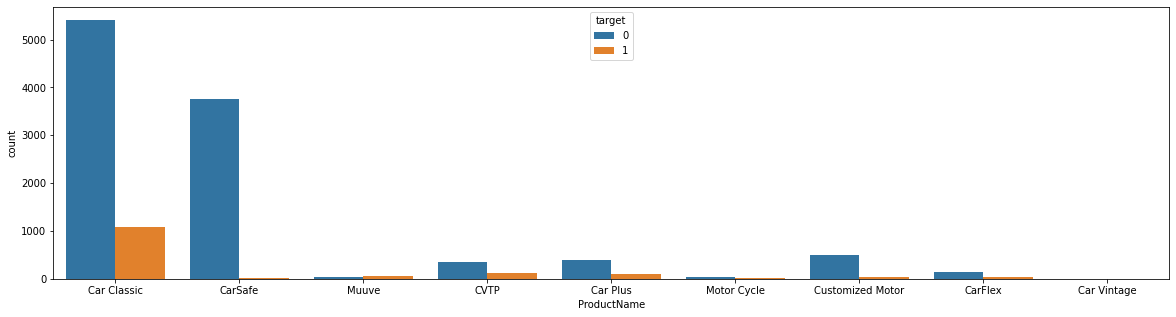

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='ProductName',hue="target",data=build_data)

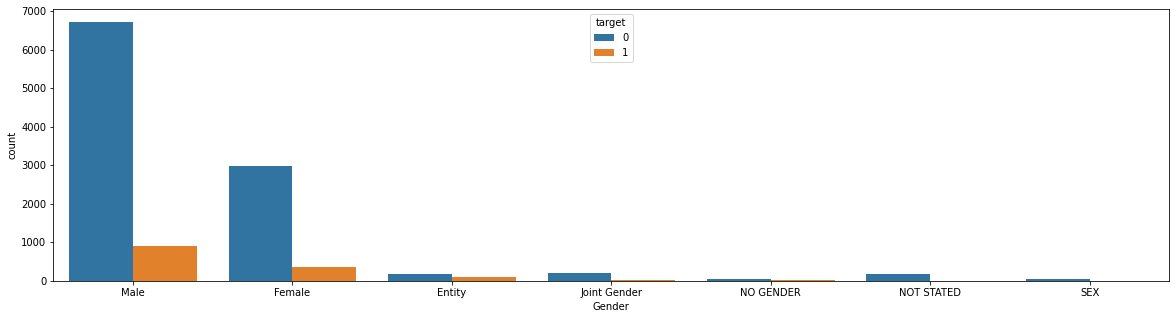

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='Gender',hue="target",data=build_data)

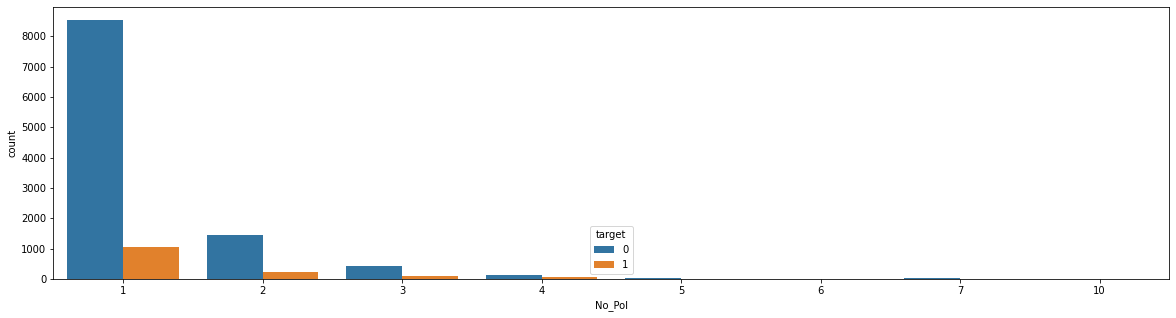

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='No_Pol',hue="target",data=build_data)

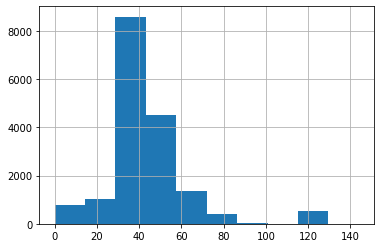

In [21]:
all_data['Age'].hist()

In [22]:
def crosstab(col, data):
  return pd.crosstab(data[col],data['target'], normalize=True)

In [23]:
all_data.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'Date diff'],
      dtype='object')

In [24]:
crosstab('No_Pol', build_data)

target,0,1
No_Pol,,
1,0.706681,0.086431
2,0.121119,0.019290
3,0.035599,0.009024
4,0.011590,0.005464
5,0.001739,0.000248
6,0.000662,0.000000
7,0.001407,0.000000
10,0.000745,0.000000


In [25]:
crosstab('Car_Category', build_data)

target,0,1
Car_Category,,
Bus,0.005395,0.001079
CAMRY CAR HIRE,0.000120,0.000000
JEEP,0.212564,0.029733
Mini Bus,0.003117,0.001199
Mini Van,0.001319,0.000240
Motorcycle,0.001798,0.000240
Pick Up,0.002638,0.000959
Pick Up > 3 Tons,0.000120,0.000000
Saloon,0.625704,0.097710


In [26]:
crosstab('Gender', build_data)

target,0,1
Gender,,
Entity,0.015614,0.008020
Female,0.253328,0.030546
Joint Gender,0.017150,0.001877
Male,0.572952,0.076962
NO GENDER,0.004522,0.001109
NOT STATED,0.014420,0.000512
SEX,0.002986,0.000000


In [27]:
crosstab('Subject_Car_Make', build_data)

target,0,1
Subject_Car_Make,,
.,0.003124,0.001458
ABG,0.000104,0.000000
ACURA,0.006040,0.000729
As Attached,0.000625,0.000521
Ashok Leyland,0.000104,0.000000
...,...,...
Volkswagen,0.012184,0.000521
Volvo,0.003020,0.000833
Wrangler Jeep,0.000208,0.000000


# Extract Date features

In [28]:
date_col = ['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [29]:
def extract_date_info(df,cols,):
    for feat in cols:
        df[feat +'_day'] = df[feat].dt.day
        df[feat +'_month'] = df[feat].dt.month
        df[feat +'_quarter'] = df[feat].dt.quarter
    df.drop(columns=date_col,axis=1,inplace=True)

In [30]:
extract_date_info(all_data,date_col)

In [31]:
all_data1 = all_data.copy()

In [32]:
cat_feat = all_data1.select_dtypes(exclude = np.number).columns
num_feat = all_data1.select_dtypes(exclude = object).columns

In [33]:
num_feat

Index(['Age', 'No_Pol', 'target', 'Date diff', 'Policy Start Date_day',
       'Policy Start Date_month', 'Policy Start Date_quarter',
       'Policy End Date_day', 'Policy End Date_month',
       'Policy End Date_quarter', 'First Transaction Date_day',
       'First Transaction Date_month', 'First Transaction Date_quarter'],
      dtype='object')

# Deal with missing values

In [34]:
for col in num_feat:
  if col != 'target':
    all_data1[col].fillna(-999, inplace = True)
    
    
    
for col in cat_feat:
    all_data1[col].fillna('NONE', inplace = True)

In [35]:
all_data1.head(3)

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date diff,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter
0,0040R73,Male,30,1,Saloon,Black,TOYOTA,NONE,NONE,Car Classic,0.0,12,14,5,2,13,5,2,14,5,2
1,0046BNK,Female,79,1,JEEP,Grey,TOYOTA,NONE,NONE,Car Classic,1.0,12,29,11,4,28,11,4,29,11,4
2,005QMC3,Male,43,1,Saloon,Red,TOYOTA,NONE,NONE,Car Classic,0.0,12,21,3,1,20,3,1,21,3,1


# Feature Engineering

In [36]:
all_data1['LGA_Name'] = all_data1['LGA_Name'].map(all_data1['LGA_Name'].value_counts().to_dict())
all_data1['State'] = all_data1['State'].map(all_data1['State'].value_counts().to_dict())

In [37]:
all_data1['Subject_Car_Make'] = all_data1['Subject_Car_Make'].map(all_data1['Subject_Car_Make'].value_counts().to_dict())
all_data1['Subject_Car_Colour'] = all_data1['Subject_Car_Colour'].map(all_data1['Subject_Car_Colour'].value_counts().to_dict())

In [38]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O',None:'O','NO GENDER':'O','NOT STATED':'O','SEX':'O' }
all_data1.Gender = all_data.Gender.map(mapper)

In [39]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
for i in ['ProductName', 'Car_Category']:
  encoder = LabelEncoder()
  all_data1[str(i)] = encoder.fit_transform(all_data1[str(i)])

In [40]:
all_data1['no_pol_prod_name'] = all_data1['No_Pol'] + all_data1['ProductName']

In [41]:
all_data1.head()

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Date diff,Policy Start Date_day,Policy Start Date_month,Policy Start Date_quarter,Policy End Date_day,Policy End Date_month,Policy End Date_quarter,First Transaction Date_day,First Transaction Date_month,First Transaction Date_quarter,no_pol_prod_name
0,0040R73,M,30,1,9,2668,7099,9258,9276,1,0.0,12,14,5,2,13,5,2,14,5,2,2
1,0046BNK,F,79,1,2,728,7099,9258,9276,1,1.0,12,29,11,4,28,11,4,29,11,4,2
2,005QMC3,M,43,1,9,361,7099,9258,9276,1,0.0,12,21,3,1,20,3,1,21,3,1,2
3,0079OHW,M,2,1,6,9967,3537,9258,9276,5,0.0,12,21,8,3,20,8,3,21,8,3,6
4,00BRP63,O,20,3,6,9967,3537,244,4550,8,1.0,4,29,8,3,31,12,4,29,8,3,11


In [42]:
print("Are There still Missing value in data? :",all_data1.isnull().any().any())
print((all_data1.isnull().sum()/all_data1.shape[0])*100)

Are There still Missing value in data? : True
ID                                 0.000000
Gender                             2.984469
Age                                0.000000
No_Pol                             0.000000
Car_Category                       0.000000
Subject_Car_Colour                 0.000000
Subject_Car_Make                   0.000000
LGA_Name                           0.000000
State                              0.000000
ProductName                        0.000000
target                            30.001159
Date diff                          0.000000
Policy Start Date_day              0.000000
Policy Start Date_month            0.000000
Policy Start Date_quarter          0.000000
Policy End Date_day                0.000000
Policy End Date_month              0.000000
Policy End Date_quarter            0.000000
First Transaction Date_day         0.000000
First Transaction Date_month       0.000000
First Transaction Date_quarter     0.000000
no_pol_prod_name              

In [43]:
all_data1.drop(columns=['ID', 'Subject_Car_Colour'],inplace=True)

In [44]:
all_data1=pd.get_dummies(all_data1)


# Model training

In [45]:
#Get the new dataset
train_n = all_data1[:ntrain].copy()
test_n = all_data1[ntrain:].copy()

In [46]:
test_n.drop("target",axis = 1,inplace = True)

In [47]:
X= train_n.drop(columns=['target'])
y= train_n.target

In [48]:
#pip install catboost

In [49]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [51]:
from sklearn.utils import class_weight
class_weight = dict(zip(np.unique(y), class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y))) 

Using Catboost

In [52]:
model2=CatBoostClassifier(class_weights=class_weight, n_estimators=800,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True,allow_writing_files=False, metric_period=20)

In [53]:
model2.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.7039397	best: 0.7039397 (0)	total: 58.6ms	remaining: 46.8s
20:	test: 0.7864506	best: 0.7864506 (20)	total: 168ms	remaining: 6.24s
40:	test: 0.7899274	best: 0.7899274 (40)	total: 274ms	remaining: 5.07s
60:	test: 0.7916314	best: 0.7916314 (60)	total: 389ms	remaining: 4.71s
80:	test: 0.7920483	best: 0.7920483 (80)	total: 502ms	remaining: 4.45s
100:	test: 0.7956565	best: 0.7956565 (100)	total: 609ms	remaining: 4.21s
120:	test: 0.7998785	best: 0.7998785 (120)	total: 727ms	remaining: 4.08s
140:	test: 0.8037395	best: 0.8037395 (140)	total: 830ms	remaining: 3.88s
160:	test: 0.8030566	best: 0.8037395 (140)	total: 938ms	remaining: 3.72s
180:	test: 0.8030172	best: 0.8037395 (140)	total: 1.04s	remaining: 3.56s
200:	test: 0.8047769	best: 0.8047769 (200)	total: 1.14s	remaining: 3.4s
220:	test: 0.8073640	best: 0.8073640 (220)	total: 1.21s	remaining: 3.18s
240:	test: 0.8079681	best: 0.8079681 (240)	total: 1.29s	remaining: 3s
260:	test: 0.8087232	best: 0.8087232 (260)	total: 1.41s	remaining:

Using xgboost

In [54]:
from xgboost import XGBClassifier
from collections import Counter

In [55]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 7.302


In [56]:
m9=XGBClassifier(scale_pos_weight=8.1922929, max_depth=10, learning_rate=0.143242, n_estimators=800, silent=True, metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
m9.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

[0]	validation_0-error:0.282495	validation_1-error:0.317053
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.069451	validation_1-error:0.17798
[200]	validation_0-error:0.053905	validation_1-error:0.17053
Stopping. Best iteration:
[146]	validation_0-error:0.058412	validation_1-error:0.165563



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.143242, max_delta_step=0, max_depth=10,
              metrics='auc', min_child_weight=1, missing=None, n_estimators=800,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0.8, reg_lambda=1,
              scale_pos_weight=8.1922929, seed=None, silent=True, subsample=1,
              verbosity=1)

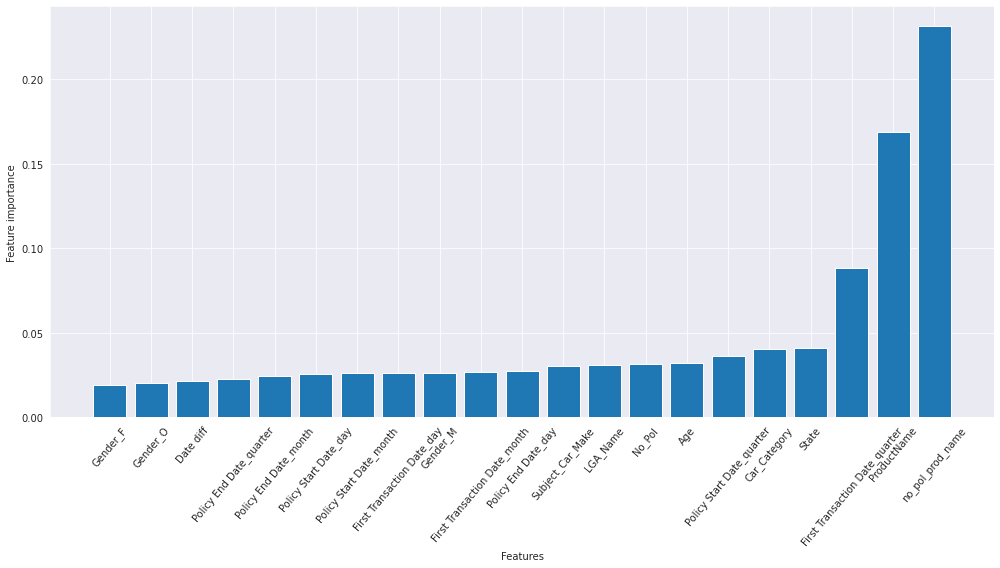

In [57]:
# summarize and sort feature importance for the ridge model
importance = m9.feature_importances_
col_sorted_by_importance=importance.argsort()

# Passing the sorted feature importance into a dataframe
feat_imp3=pd.DataFrame({
    'cols':test_n.columns[col_sorted_by_importance],
    'imps':importance[col_sorted_by_importance]
})

# plot feature importance
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
plt.bar(x='cols', height='imps',data=feat_imp3)
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.tight_layout()

In [58]:
m10=XGBClassifier(scale_pos_weight=12, max_depth=14, learning_rate=0.22, n_estimators=800, silent=True, metrics='auc',colsample_bylevel=0.85, reg_alpha=0.8)
m10.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

[0]	validation_0-error:0.2457	validation_1-error:0.305464
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.052525	validation_1-error:0.169702
[200]	validation_0-error:0.051697	validation_1-error:0.165563
[300]	validation_0-error:0.051697	validation_1-error:0.164735
Stopping. Best iteration:
[232]	validation_0-error:0.051697	validation_1-error:0.163907



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.22, max_delta_step=0, max_depth=14, metrics='auc',
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.8, reg_lambda=1, scale_pos_weight=12, seed=None,
              silent=True, subsample=1, verbosity=1)

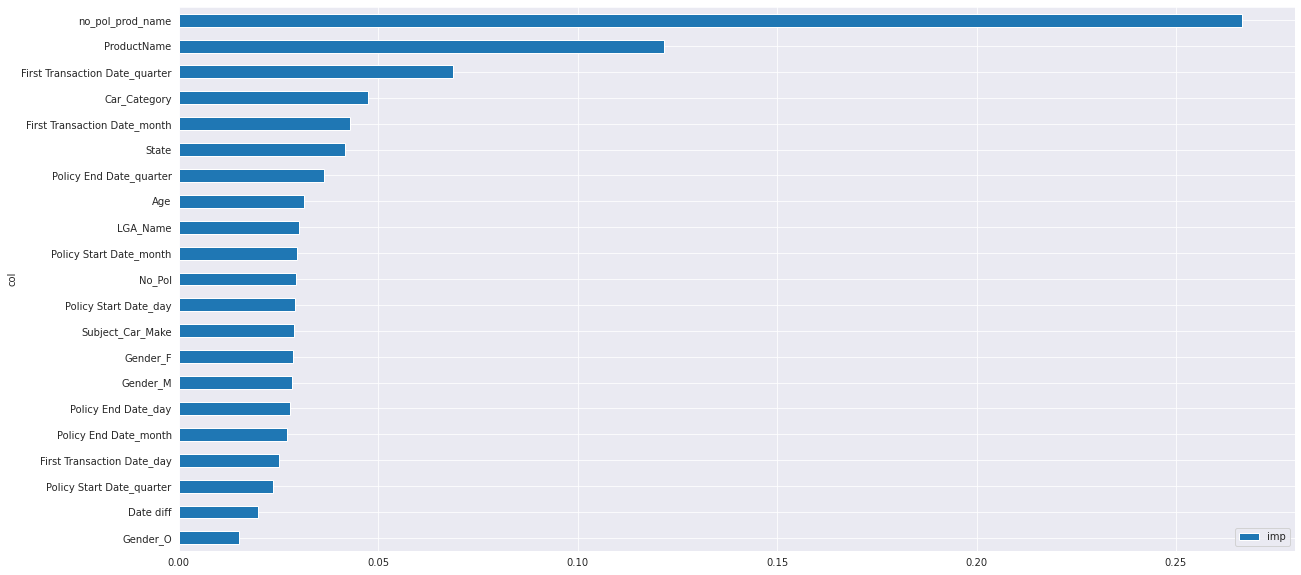

In [59]:
fea_imp = pd.DataFrame({'imp':m10.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [61]:
ss = pd.read_csv('/content/drive/MyDrive/umoja data/UHNigeria/SampleSubmission.csv')
sub_file = ss.copy()

Cross validation

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

target = 'target'
features = [c for c in train_n.columns if c not in ['target']]

In [63]:
scores = 0
test_oofs = []
k = 5
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]
    
    #scaler1.fit(xtrain)
    
    #xtrain = scaler1.transform(xtrain)
    #xval = scaler1.transform(xval)
    test = test_n[features]

   # training and validation
    model=XGBClassifier(scale_pos_weight=8.1922929, max_depth=10, \
                        learning_rate=0.143242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=100,verbose=100)
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

[0]	validation_0-error:0.327815
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.196606
[200]	validation_0-error:0.180877
[300]	validation_0-error:0.178394
[400]	validation_0-error:0.176738
Stopping. Best iteration:
[387]	validation_0-error:0.176738

Fold 0 : 0.5895993531433191
[0]	validation_0-error:0.335265
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.16846
[200]	validation_0-error:0.164321
[300]	validation_0-error:0.15894
[400]	validation_0-error:0.157285
Stopping. Best iteration:
[363]	validation_0-error:0.156457

Fold 1 : 0.6634113604204569
[0]	validation_0-error:0.31457
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.169702
[200]	validation_0-error:0.156457
[300]	validation_0-error:0.15356
Stopping. Best iteration:
[284]	validation_0-error:0.152732

Fold 2 : 0.6462510612492419
[0]	validation_0-error:0.33899
Will train until validation_0-error

In [64]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('newfoldxgb.csv',index=False) #0.65863 priv LB

In [65]:
scores = 0
test_oofs = []
k = 8
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]
    
    #scaler1.fit(xtrain)
    
    #xtrain = scaler1.transform(xtrain)
    #xval = scaler1.transform(xval)
    test = test_n[features]

   # training and validation
    model=XGBClassifier(scale_pos_weight=8.5922929, max_depth=12, \
                        learning_rate=0.163242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=100,verbose=100)
    pred = model.predict(xval)

    #predicting on test set
    predictions = model.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

[0]	validation_0-error:0.317881
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.184106
[200]	validation_0-error:0.175497
[300]	validation_0-error:0.172848
[400]	validation_0-error:0.171523
Stopping. Best iteration:
[386]	validation_0-error:0.170199

Fold 0 : 0.6068946114126836
[0]	validation_0-error:0.309934
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.165563
[200]	validation_0-error:0.163576
Stopping. Best iteration:
[114]	validation_0-error:0.161589

Fold 1 : 0.6449796438501257
[0]	validation_0-error:0.296026
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.168212
Stopping. Best iteration:
[68]	validation_0-error:0.165563

Fold 2 : 0.6806525552760493
[0]	validation_0-error:0.309934
Will train until validation_0-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.162252
[200]	validation_0-error:0.156954
[300]	validation_0-error:0.15695

In [66]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('newfoldxgb2.csv',index=False) # 0.658569 priv LB

Stacking

In [69]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [70]:
from lightgbm import LGBMClassifier

In [79]:
xgb1=XGBClassifier(scale_pos_weight=8.1922929, max_depth=10, \
                        learning_rate=0.143242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)

xgb2=XGBClassifier(scale_pos_weight=8.5922929, max_depth=12, \
                        learning_rate=0.163242, n_estimators=800, silent=True,\
                        metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)

ctb1=CatBoostClassifier(class_weights=class_weight, n_estimators=800,\
                        eval_metric='AUC',max_depth=4,learning_rate=0.1,
                              subsample=0.9,bootstrap_type='Bernoulli'
                    ,allow_writing_files=False, metric_period=20)


In [80]:
vcf = VotingClassifier(estimators=[('xgb1', xgb1),\
                                   ('xgb2', xgb2), ('ctb1', ctb1)], voting='soft')

In [81]:
scores = 0
test_oofs = []
k = 8
kf = StratifiedKFold(k)

for i, (tr_idx, vr_idx) in enumerate(kf.split(train_n, train_n[target])):
    xtrain, ytrain = train_n.loc[tr_idx, features], train_n.loc[tr_idx, target]
    xval, yval = train_n.loc[vr_idx, features], train_n.loc[vr_idx, target]
    
    test = test_n[features]
    vcf.fit(xtrain,ytrain)

    pred = vcf.predict(xval)

    #predicting on test set
    predictions = vcf.predict(test)
    score = roc_auc_score(yval, pred)
    #
    scores += score/k
    test_oofs.append(predictions)

    print('Fold {} : {}'.format(i, score))

print()
print()
print('roc_auc_score : ', scores)

0:	total: 6.19ms	remaining: 4.95s
20:	total: 114ms	remaining: 4.21s
40:	total: 235ms	remaining: 4.35s
60:	total: 341ms	remaining: 4.13s
80:	total: 418ms	remaining: 3.71s
100:	total: 497ms	remaining: 3.44s
120:	total: 572ms	remaining: 3.21s
140:	total: 645ms	remaining: 3.02s
160:	total: 726ms	remaining: 2.88s
180:	total: 800ms	remaining: 2.73s
200:	total: 876ms	remaining: 2.61s
220:	total: 985ms	remaining: 2.58s
240:	total: 1.09s	remaining: 2.53s
260:	total: 1.2s	remaining: 2.49s
280:	total: 1.31s	remaining: 2.42s
300:	total: 1.42s	remaining: 2.35s
320:	total: 1.53s	remaining: 2.28s
340:	total: 1.63s	remaining: 2.2s
360:	total: 1.75s	remaining: 2.13s
380:	total: 1.86s	remaining: 2.04s
400:	total: 1.96s	remaining: 1.95s
420:	total: 2.07s	remaining: 1.86s
440:	total: 2.17s	remaining: 1.77s
460:	total: 2.26s	remaining: 1.66s
480:	total: 2.34s	remaining: 1.55s
500:	total: 2.41s	remaining: 1.44s
520:	total: 2.49s	remaining: 1.33s
540:	total: 2.57s	remaining: 1.23s
560:	total: 2.67s	remaining

In [82]:
predictions = np.mean(test_oofs, axis=0)
predtest = [int(round(i)) for i in predictions]
sub_file.target = predtest
sub_file.to_csv('vcf.csv',index=False) # 0.65957 priv LB